In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species
df =  pd.read_csv("data/penguins.csv")
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


# Исследование

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,NaN,NaN,NaN,43.92193,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,NaN,NaN,NaN,17.15117,1.974793,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,342.0,NaN,NaN,NaN,214.01462,260.558057,-132.0,190.0,197.0,213.75,5000.0
body_mass_g,342.0,NaN,NaN,NaN,4201.754386,801.954536,2700.0,3550.0,4050.0,4750.0,6300.0
sex,335,3,MALE,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['sex'].value_counts()

sex
MALE      169
FEMALE    165
.           1
Name: count, dtype: int64

In [6]:
df[df['sex'] == '.'] = None

In [7]:
df.isna().sum()

culmen_length_mm      3
culmen_depth_mm       3
flipper_length_mm     3
body_mass_g           3
sex                  10
dtype: int64

In [8]:
df_clean = df.dropna()

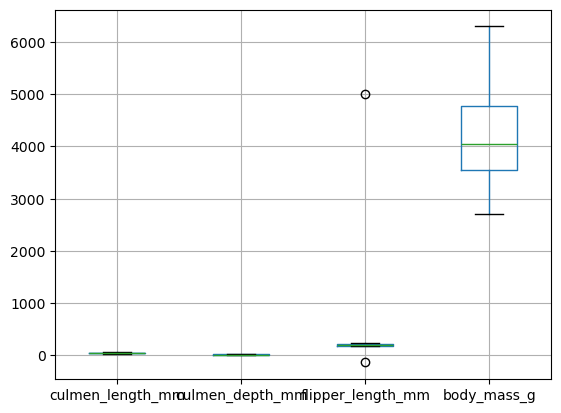

In [9]:
df_clean.boxplot()
plt.show()

In [10]:
df_clean['flipper_length_mm'].sort_values()

14     -132.0
28      172.0
20      174.0
122     176.0
31      178.0
        ...  
285     230.0
295     230.0
221     230.0
283     231.0
9      5000.0
Name: flipper_length_mm, Length: 334, dtype: float64

In [11]:
df_clean.drop([9, 14], inplace=True)

/var/folders/v1/_044sdz57w31hjpd502812fm0000gn/T/ipykernel_17198/132975366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop([9, 14], inplace=True)


In [12]:
df_dummy = pd.get_dummies(df_clean, drop_first=True)
df_dummy

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,True
1,39.5,17.4,186.0,3800.0,False
2,40.3,18.0,195.0,3250.0,False
4,36.7,19.3,193.0,3450.0,False
5,39.3,20.6,190.0,3650.0,True
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False
340,46.8,14.3,215.0,4850.0,False
341,50.4,15.7,222.0,5750.0,True
342,45.2,14.8,212.0,5200.0,False


In [13]:
df_dummy.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex_MALE             0
dtype: int64

# Предобработка

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_dummy)
df_scaled = pd.DataFrame(data=scaled, columns=df_dummy.columns)
df_scaled

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,0.993994
...,...,...,...,...,...
327,0.583904,-1.764152,0.929309,0.892415,-1.006042
328,0.510432,-1.457611,1.000662,0.799264,-1.006042
329,1.171681,-0.742347,1.500134,1.917074,0.993994
330,0.216543,-1.202160,0.786603,1.233968,-1.006042


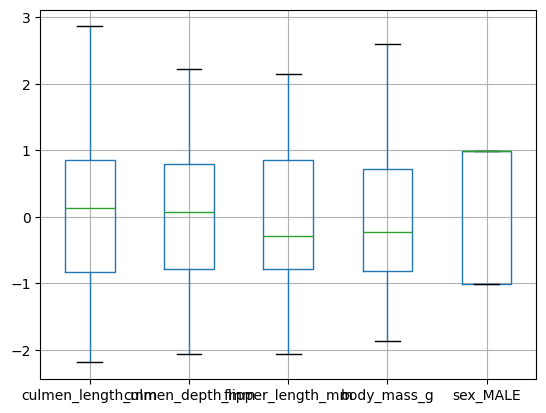

In [16]:
df_scaled.boxplot()
plt.show()

In [17]:
from sklearn.decomposition import PCA


def plot_2d(x, clusters):
    pca = PCA(n_components=2)
    x_pca = pca.fit_transform(x)

    plt.scatter(x_pca[:, 0], x_pca[:, 1], c=clusters, cmap='viridis')
    plt.title(f'{len(np.unique(clusters))} clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# K means++

In [18]:
from sklearn.cluster import KMeans

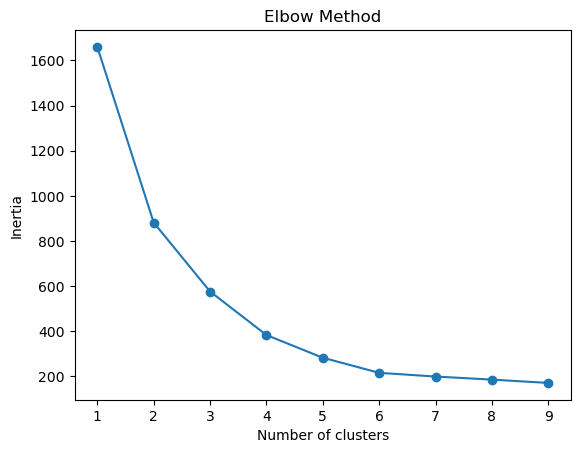

In [19]:
inertia = []
rnge = range(1, 10)
for k in rnge:
    kmeans = KMeans(init="k-means++", n_init=10, n_clusters=k, random_state=101).fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(rnge, inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [20]:
n_clusters = 4

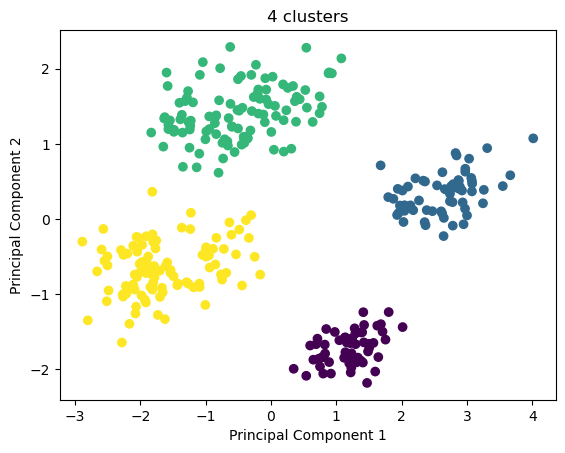

In [21]:
clusters = KMeans(init="k-means++", n_init=10, n_clusters=n_clusters, random_state=101).fit_predict(df_scaled)
plot_2d(df_scaled.values, clusters)

# DBSCAN

In [24]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

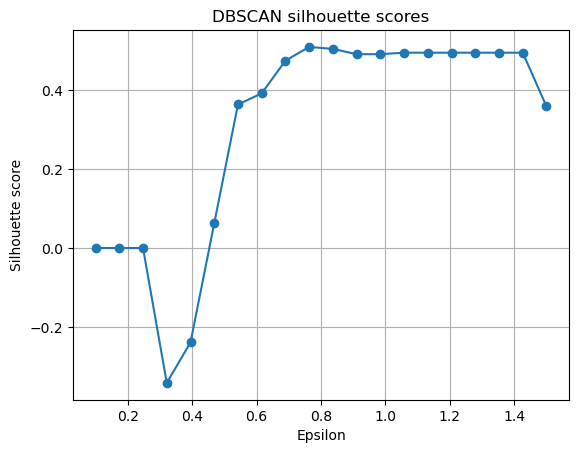

In [37]:
silhouette_scores = []
eps_values = np.linspace(0.1, 1.5, num=20)
for eps in eps_values:
    dbscan = DBSCAN(eps=eps).fit(df_scaled)
    if len(np.unique(dbscan.labels_)) > 1:
        silhouette_scores.append(silhouette_score(df_scaled, dbscan.labels_))
    else:
        silhouette_scores.append(0)

silhouette_scores = np.array(silhouette_scores)
plt.plot(eps_values, silhouette_scores, marker='o')
plt.title('DBSCAN silhouette scores')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette score')
plt.grid(True)
plt.show()

In [34]:
epsilon = eps_values[silhouette_scores.argmax()]
epsilon

0.763157894736842

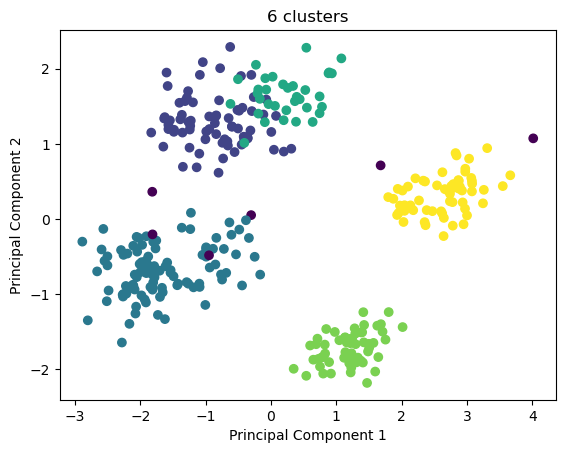

In [35]:
clusters = DBSCAN(eps=epsilon).fit_predict(df_scaled)
plot_2d(df_scaled.values, clusters)